In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine

# get database login/pwd
from db_keys import db_cred

# set Postgres target db
local_db_name = 'PewHackEmployees'

In [2]:
# Create engine and connection
engine = create_engine(f'postgresql://{db_cred}@localhost:5432/{local_db_name}')
conn = engine.connect()


In [3]:
# Read salary data into new DataFrame
my_df = pd.read_sql('select salary from salaries', conn)
my_df.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


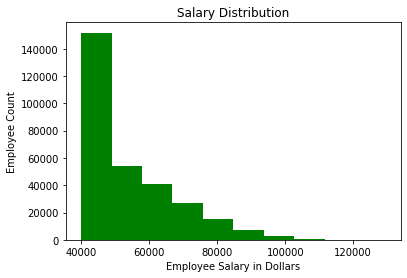

In [4]:
# plot salary distribution

plt.hist(my_df.salary, bins=10, color="green")
plt.title("Salary Distribution")
plt.xlabel("Employee Salary in Dollars")
plt.ylabel("Employee Count")
plt.show()

In [5]:
# get average salary by title using new view

avg_salary = pd.read_sql("select * from vw_avg_salary_by_title", conn)
avg_salary

,title,average_salary
0,Senior Staff,58550.0
1,Staff,58465.0
2,Manager,51531.0
3,Technique Leader,48583.0
4,Assistant Engineer,48564.0
5,Engineer,48535.0
6,Senior Engineer,48507.0


<BarContainer object of 7 artists>

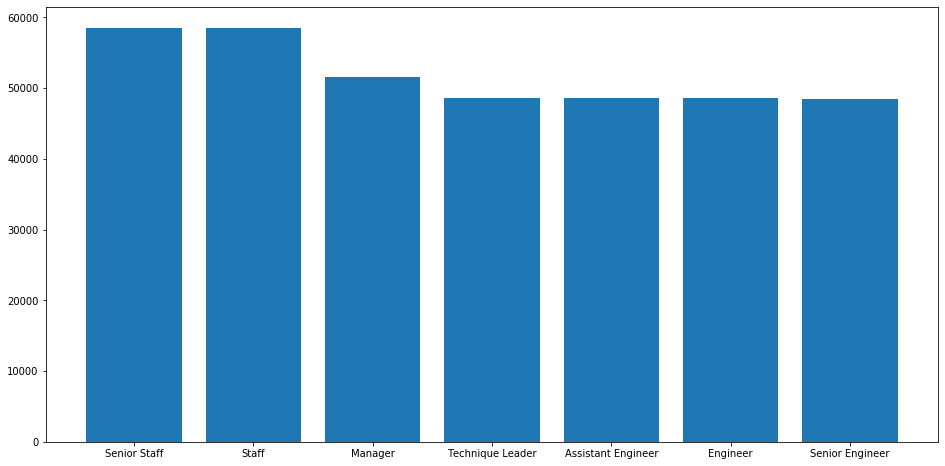

In [6]:
# plot graph of average salaries by title
plt.figure(figsize=(16, 8))
plt.bar(avg_salary.title, height=avg_salary.average_salary)

In [7]:
# BONUS: who am I? (also found in SQL script)
my_record = pd.read_sql('select * from employees where emp_no = 499942', conn)
my_record

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
